# TA Assignment: end-to-end completion of the data science pipeline

## Student Performance Data Set

Downloaded from the __[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/student+performance)__  on June 11, 2020. The dataset description is as follows:

- Data Set: Multivariate
- Attribute: Integer
- Tasks: Classification, Regression
- Instances: 395
- Attributes: 33

### Dataset Information:

Although the educational level of Portugal has improved in the last decade, high student failure rates continue to be an issue. In particular, lack of success in the core classes of Mathematics and the Portuguese language is extremely detrimental to student achievement. In this paper, researchers set out to test whether ML techniques could accurately predict student achievement in secondary education based on student grades, demographic, social and school related
factors.

Data was collected during the 2005-2006 school year from two public schools, from the Alentejo region of Portugal. The database was built from two sources: school reports, based on paper sheets and including few attributes (i.e. the three period grades and number of school absences); and questionnaires, which included questions on social/emotional (e.g. alcohol consumption) (Pritchard and Wilson 2003) and school related (e.g. number of past class failures) variables that were expected to affect student performance. 788 students participated in this study. 

The dataset can be used for the tasks of classification and regression analysis.

### Attribute Information:

There are 33 attributes in the dataset:

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (nuRmeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

Output: G3 (final grade): numeric from 0 to 20. 

**Note: I have created a binary classification problem by characterizing G3 grades 0-9 = fail (0) and 10-20 = pass (1)**

### Relevant Papers:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

## Data Exploration and Visualization

In this section we will begin to explore the dataset to determine relevant information.

In [1]:
import os
import json
import time
import pickle
import requests


import numpy as np
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.2f}'.format})
import pandas as pd
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#setting visual preferences
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Data Ingestion from the UCI Repository 

In [3]:
# Here we define the features of the dataset and use panda's read CSV function to read
# the data into a DataFrame, df

FEATURES  = [
    "school", #student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
    "sex", #student's sex (binary: "F" - female or "M" - male)
    "age", #student's age (numeric: from 15 to 22)
    "address", #student's home address type (binary: "U" - urban or "R" - rural)
    "famsize", #family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
    "Pstatus", #parent's cohabitation status (binary: "T" - living together or "A" - apart)
    "Medu", #mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    "Fedu", #father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    "Mjob", #mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    "Fjob", #father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    "reason", #reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
    "guardian", #student's guardian (nominal: "mother", "father" or "other")
    "traveltime", #home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    "studytime", #weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    "failures", #number of past class failures (numeric: n if 1<=n<3, else 4)
    "schoolsup", #extra educational support (binary: yes or no)
    "famsup", #family educational support (binary: yes or no)
    "paid", #extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    "activities", #extra-curricular activities (binary: yes or no)
    "nurseryattended", #nursery school (binary: yes or no)
    "higher", #wants to take higher education (binary: yes or no)
    "internet", #Internet access at home (binary: yes or no)
    "romantic", #with a romantic relationship (binary: yes or no)
    "famrel", #quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    "freetim", #free time after school (numeric: from 1 - very low to 5 - very high)
    "goout", #going out with friends (numeric: from 1 - very low to 5 - very high)
    "Dalc", #workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    "Walc", #weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    "health", #current health status (numeric: from 1 - very bad to 5 - very good)
    "absences", #number of school absences (numeric: from 0 to 93)

    # these grades are related with the course subject, Math or Portuguese:
    "G1", #first period grade (numeric: from 0 to 20)
    "G2", #second period grade (numeric: from 0 to 20)
    "G3" #final grade (numeric: from 0 to 20, output target)
]

LABEL_MAP = {
    0-9: "Fail", 
    10-20: "Pass",
}

# Read the data into a DataFrame, df
df = pd.read_csv("data/student-mat.csv", sep=';', skiprows=1 , names=FEATURES)

# Taking a closer look at the data
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetim,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Exploratory Data Analyses

In [4]:
# Describe the dataset
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel     freetim       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

We use **df.describe** to get a summary of our data. We can see that there are no missing data because the "count" for each attribute is 395. 

In [5]:
#Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

#Determine the frequency of each final grade - G3
print(df.groupby('G3')['G3'].count())

395 instances with 33 features

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64


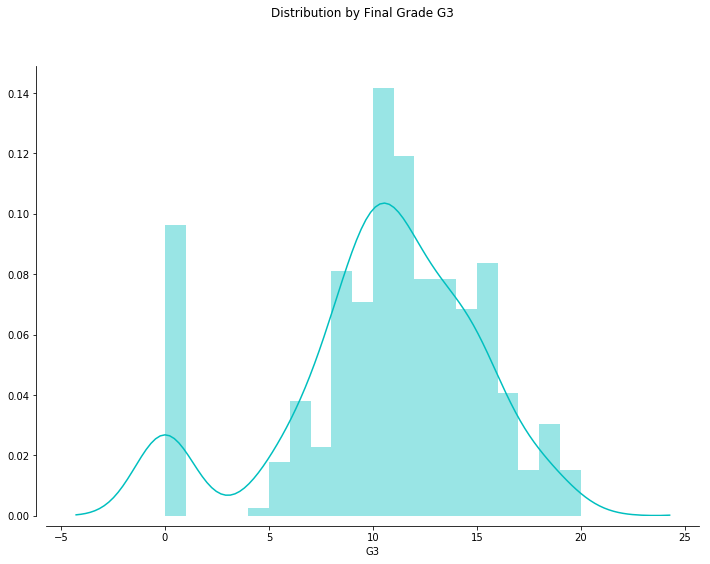

In [6]:
#plotting distribution by our target variable, final grade (G3)
y = df.loc[:,'G3']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
age = sns.distplot(y, bins=20, color='c', ax=ax)
ax.set_xlabel('G3')
ax.grid(False)
fig.suptitle('Distribution by Final Grade G3')
sns.despine(offset=10, trim=False)

We can see there a 38 students who received 0's. We don't know if this is because they withdrew from the course or really received 0. Instead of droping the 38 students we will keep them in the dataset and classify them as "fails" in the step below. 

**We could do regression tasks with this data but for the sake of this assignment, we're going to create a binary classification problem by binning G3 into two groups. Final grades (G3) that are 0-9 are classified as "fail" (class = 0) and final grades of 10-20 are classified as "pass" (class = 1).**

In [7]:
#changing target variable to binary because we want to do classification
df['G3'] = df['G3'].replace([0,1,2,3,4,5,6,7,8,9], 0) #fail
df['G3'] = df['G3'].replace([10,11,12,13,14,15,16,17,18,19,20], 1) #pass

In [8]:
#Determine the frequency of each final grade - G3
print(df.groupby('G3')['G3'].count())

G3
0    130
1    265
Name: G3, dtype: int64


 PASS:  265
 FAIL:  130
 Proportion:  2.04 : 1


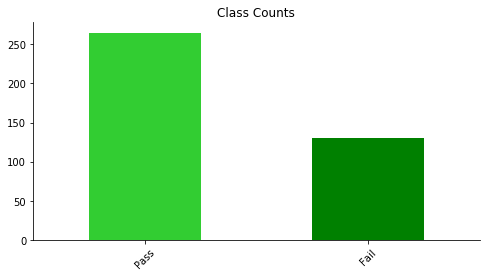

In [9]:
#plotting our target classes
grade = df.G3.value_counts()
print(color.BOLD, 'PASS:', color.END, grade[1])
print(color.BOLD, 'FAIL:', color.END, grade[0])
print(color.BOLD, 'Proportion:', color.END, round(grade[1] / grade[0], 2), ': 1')
my_colors = ["limegreen", "green"]
a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)
grade.plot(kind='bar', title='Class Counts', color=my_colors, ax=ax)
ax.set_xticklabels(['Pass', 'Fail'], rotation = 45)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We see that there are 265 instances of pass (class = 1) and 130 instances of fail (class = 0). This tells us **class imbalance** may be an issue because there are far more instances of passes than fails. We've learned that most machine learning algorithms work best when the number of instances of each classes are roughly equal. 

Now let's plot some of the other attributes to get a sense of our data. 

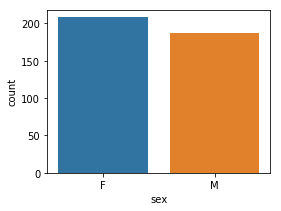

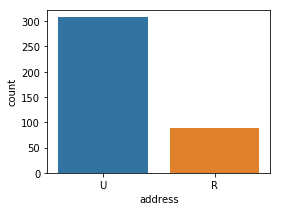

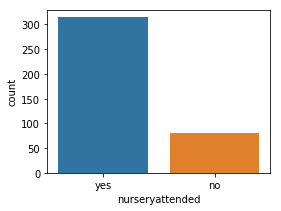

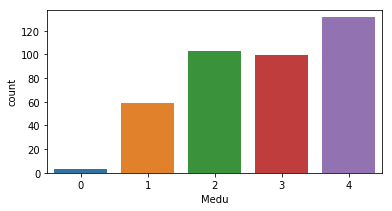

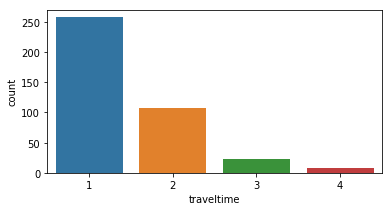

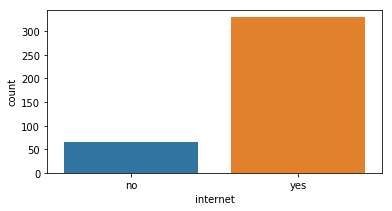

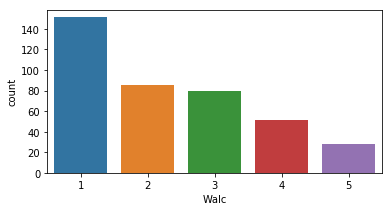

In [10]:
#plotting variables to explore dataset
plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'sex')

plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'address')#u=urban, r=rural

plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'nurseryattended')

plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'Medu') #mother's education (nurmeric: 0 - none, 1 - primary education (4th grade),
#2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'traveltime') #home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 
#3 - 30 min. to 1 hour, or 4 - >1 hour)

plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'internet')

plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'Walc') #weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

These graphs show us that most students who responded to the surveys live in urban areas, attended nursery school, live close to school (travel time), and have internet access. The majority of students report low weekend alcohol consumption.

We also can see that the gender split is relatively equal and that mothers' education levels vary but trend toward secondary education and above. 

Now let's look at the interaction of certain attributes and our target class. 

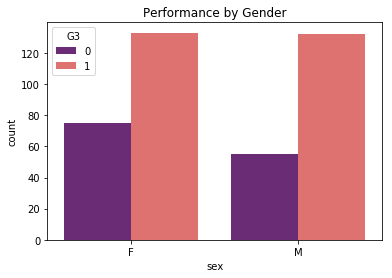

In [11]:
sns.countplot(x = 'sex', hue = 'G3', data = df, palette='magma')
plt.title('Performance by Gender')
plt.show()

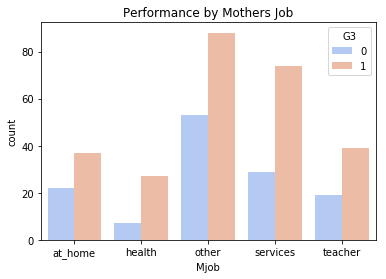

In [12]:
sns.countplot(x = 'Mjob', hue = 'G3', data = df, palette = 'coolwarm')
plt.title('Performance by Mothers Job')
plt.show()

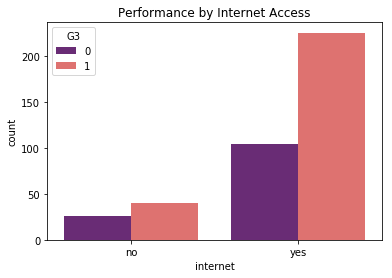

In [13]:
sns.countplot(x = 'internet', hue = 'G3', data = df, palette = 'magma')
plt.title('Performance by Internet Access')
plt.show()

### Data Wrangling

In [14]:
#checking the data types so we know which variables we'll have to convert 
df.dtypes

school             object
sex                object
age                 int64
address            object
famsize            object
Pstatus            object
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian           object
traveltime          int64
studytime           int64
failures            int64
schoolsup          object
famsup             object
paid               object
activities         object
nurseryattended    object
higher             object
internet           object
romantic           object
famrel              int64
freetim             int64
goout               int64
Dalc                int64
Walc                int64
health              int64
absences            int64
G1                  int64
G2                  int64
G3                  int64
dtype: object

This dataset contains numerical values (stored as integers) as well as categorical values (stored as objects). For ease of modeling and analyses, we want to convert the categorical data into numerical values. One way to do this is by creating a mapping dictionary that contains each column to process as well as a dictionary of the values to translate and then using the replace function. 

In [15]:
#create a new dataframe containing just the object type data
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nurseryattended,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [16]:
#create dictionary showing how to translate values
cleanup_nums = {"school": {"GP": 0, "MS": 1},
                "sex": {"F": 0, "M": 1},
                "address": {"U": 0, "R": 1},
                "famsize": {"GT3":0, "LE3":1},
                "Pstatus": {"A":0, "T":1},
                "schoolsup":{"yes":0, "no":1},
                "famsup": {"yes":0, "no":1},
                "paid": {"yes":0, "no":1},
                "activities": {"yes":0, "no":1},
                "nurseryattended": {"yes":0, "no":1},
                "higher": {"yes":0, "no":1},
                "internet": {"yes":0, "no":1},
                "romantic": {"yes":0, "no":1}
               }
                

In [17]:
#use the replace function to convert variables based on dictionary above
df.replace(cleanup_nums, inplace=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetim,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,0,0,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,0,1,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,0,0,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,0,0,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1


In [18]:
#checking data types to make sure data was wrangled properly 
df.dtypes

school              int64
sex                 int64
age                 int64
address             int64
famsize             int64
Pstatus             int64
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian           object
traveltime          int64
studytime           int64
failures            int64
schoolsup           int64
famsup              int64
paid                int64
activities          int64
nurseryattended     int64
higher              int64
internet            int64
romantic            int64
famrel              int64
freetim             int64
goout               int64
Dalc                int64
Walc                int64
health              int64
absences            int64
G1                  int64
G2                  int64
G3                  int64
dtype: object

We've converted most of the object type data into integers. We didn't convert a few variables (Mjob, Fjob, reason, guardian) because these examples are nominal data, meaning that unlike ordinal data, these have no intrinsic ordering to them. We'll use one-hot encoding, or dummy variables for these attributes. 


In [19]:
df = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'reason', 'guardian'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [20]:
df.dtypes

school               int64
sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nurseryattended      int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetim              int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
F

### Feature Analysis and Selection

Here, we're looking at the correlation coefficients between features and target, as well as between independent features to assess their importance in relation with the target, as well as to spot potential feature multicollinearity.

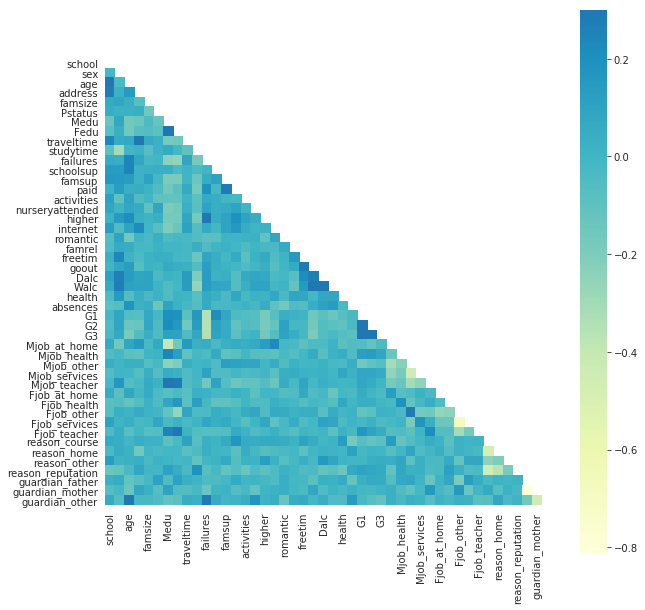

In [21]:
corr = df.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nurseryattended', 'higher', 'internet', 'romantic',
       'famrel', 'freetim', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']].corr()
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='YlGnBu', center=0)
    ax.grid(False)

Let's put all coefficients into a list and sort them in descending order to understand which features are the most important ones when it comes to predicting final grades.

In [22]:
cor_dict = corr['G3'].to_dict()
del cor_dict['G3']
print(color.BOLD, "List of the features decendingly by their correlation with G3:", color.END)
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: {1}".format(*ele))

 List of the features decendingly by their correlation with G3: 
G2: 0.7254069957220733
G1: 0.6649786012219561
failures: -0.33773129596942547
goout: -0.18339868866900055
age: -0.17964488578240712
higher: -0.15770763492363793
Medu: 0.1153961717905148
Fedu: 0.10805700850955999
guardian_other: -0.10797689541630659
schoolsup: 0.09986023276080189
romantic: 0.09773660457276945
paid: -0.0926654599637454
reason_course: -0.0925335308502545
absences: -0.09224367359659331
Mjob_health: 0.08048414327712364
studytime: 0.07461252094184534
Mjob_other: -0.07416289934133692
sex: 0.07061768291993666
reason_reputation: 0.0677713696830495
health: -0.06566751132095168
internet: -0.06179056619731354
Mjob_services: 0.06011409566976264
guardian_father: 0.059346769207672914
famsup: 0.0592191760064306
Dalc: -0.05734277138982294
reason_other: 0.05331623022889068
Fjob_teacher: 0.052557162119606
address: -0.05228240421336913
famrel: 0.04668335769255136
traveltime: -0.04444648416244224
Pstatus: -0.044050217591330966

We have A LOT of features. Let's eliminate some that don't seem to impact final grade in order to improve model performance. 

In [23]:
df = df.drop(["famsize","schoolsup",'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other','health', 'Pstatus', 'Dalc', 'Walc', 'nurseryattended', 'famrel', 'school', 'famsup', 'absences', 'activities', 'freetim'], axis=1)
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'paid', 'higher', 'internet', 'romantic', 'goout', 'G1',
       'G2', 'G3'],
      dtype='object')

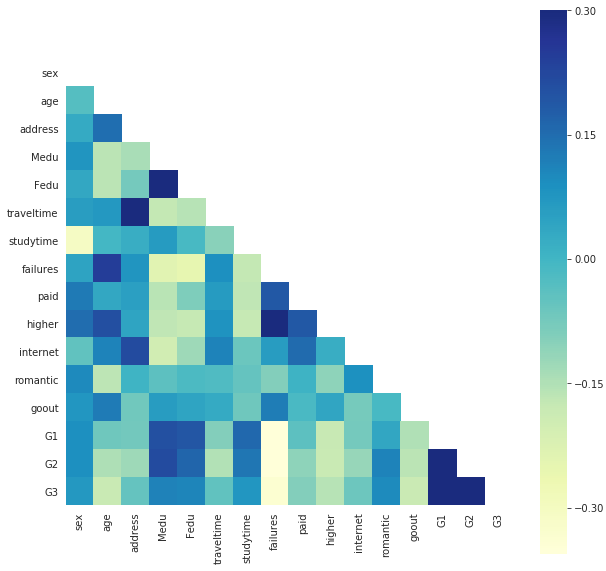

In [24]:
#replotting with fewer variables
corr = df.loc[:, ['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'paid', 'higher', 'internet', 'romantic', 'goout', 'G1',
       'G2', 'G3']].corr()
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='YlGnBu', center=0)
    ax.grid(False)

In [25]:
cor_dict = corr['G3'].to_dict()
del cor_dict['G3']
print(color.BOLD, "List of the features decendingly by their correlation with G3:", color.END)
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: {1}".format(*ele))

 List of the features decendingly by their correlation with G3: 
G2: 0.7254069957220733
G1: 0.6649786012219561
failures: -0.33773129596942547
goout: -0.18339868866900055
age: -0.17964488578240712
higher: -0.15770763492363793
Medu: 0.1153961717905148
Fedu: 0.10805700850955999
romantic: 0.09773660457276945
paid: -0.0926654599637454
studytime: 0.07461252094184534
sex: 0.07061768291993666
internet: -0.06179056619731354
address: -0.05228240421336913
traveltime: -0.04444648416244224


We can see that grades (G1 and G2) are correlated with G3 and with eachother. Address appears to be correlated with traveltime, which makes sense. We can also see that failures seem to be negatively correlated with grades, meaning has failures increase, grades decrease. 

In [26]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

395 instances with 16 features



Here we're using Scikit-Learn transformers to prepare data for ML. The sklearn.preprocessing package provides utility functions and transformer classes to help us transform input data so that it is better suited for ML. Here we're using LabelEncoder to encode the "final grade"(G3) variable with a value between 0 and n_classes-1 (in our case, 1).

In [27]:
from sklearn.preprocessing import LabelEncoder

FEATURES = df.columns

# Extract our X and y data
X = df[FEATURES[:-1]]
y = df["G3"]

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

print(X.shape, y.shape)

(395, 15) (395,)


### Data Visualization

Here we're using Pandas and Yellowbrick to create various visualizations of our data. 

First, we're creating a matrix of scatter plots of the features in our dataset.  This is useful for understanding how our features interact with eachother. 

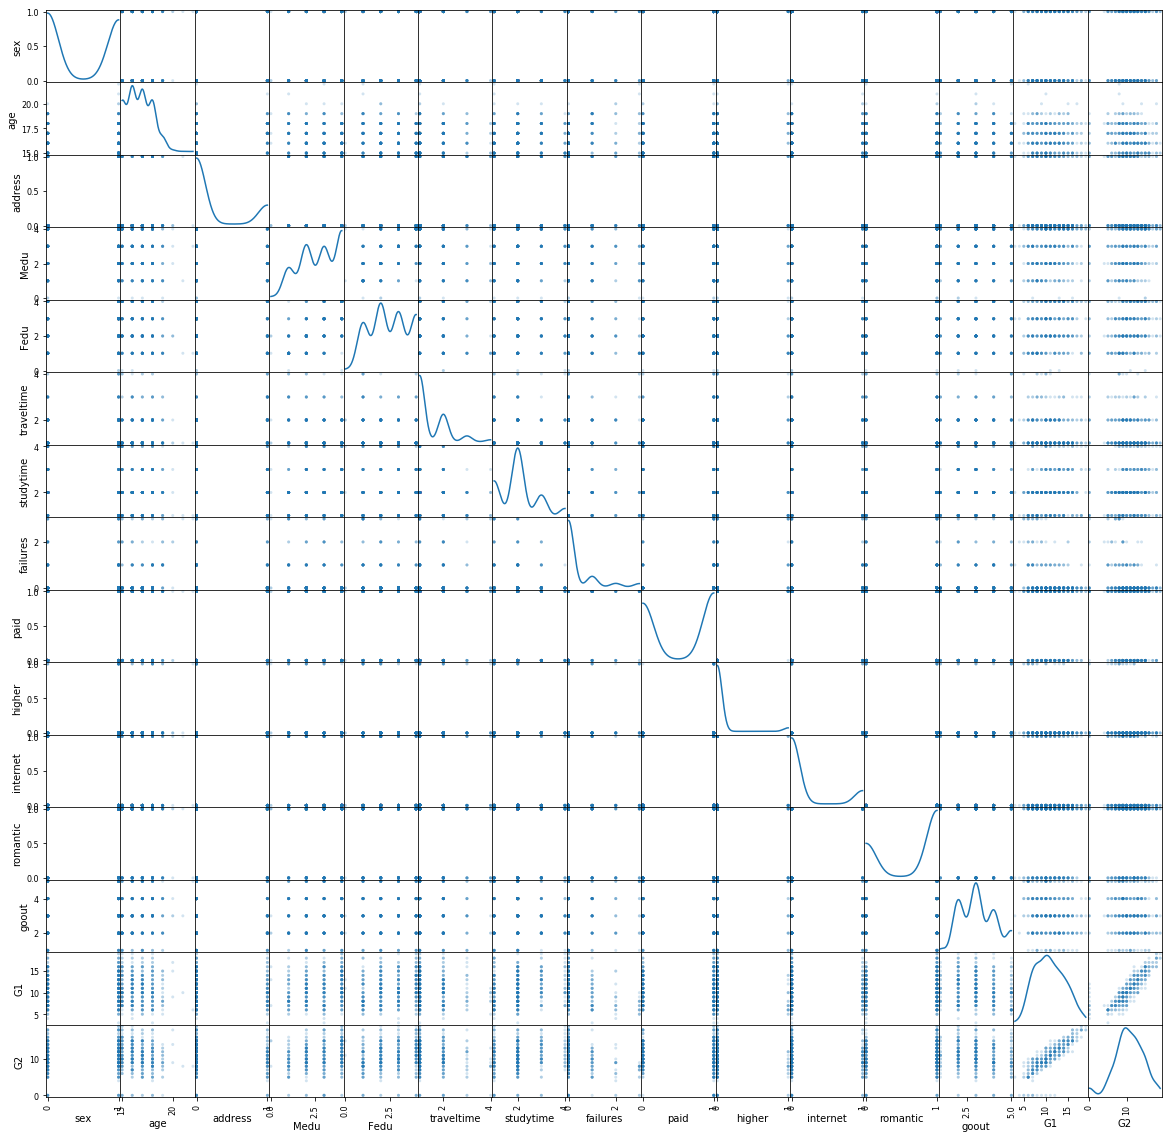

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

In the diagnol of this plot, rather than seeing a plot of a column against itself, Pandas gives us more useful information and plots the density plot of just that column of data. We see going out with friends (goout) is much more evenly distributed, whereas mother's education (Medu) trends toward the higher end. 

This visualization confirms that G1 is correlated with G2. Because we have so many categorical variables stored as binaries, we see a lot of veritcal or horizontal lines rather than points forming around a trend line. 

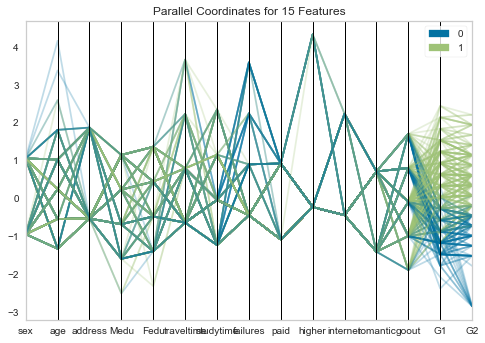

In [29]:
from yellowbrick.features import ParallelCoordinates

oz = ParallelCoordinates(classes=encoder.classes_, normalize='standard').fit(X, y)
_ = oz.poof()

**Parallel coordinates** is multi-dimensional feature visualization technique that allows us to detect clusters of instances that have similar classes, and to note features that have high variance or different distributions. It's clear that by looking at the right side of the plot (G1 and G2) that we can see that for students who received a pass on their final grade (target = 1, green line) had higher G1 and G2 grades than student who failed their final grade (target = 0, blue line). It's difficult to detect additional clusters without expanding the size of the plot which I can't figure out how to do right now. 

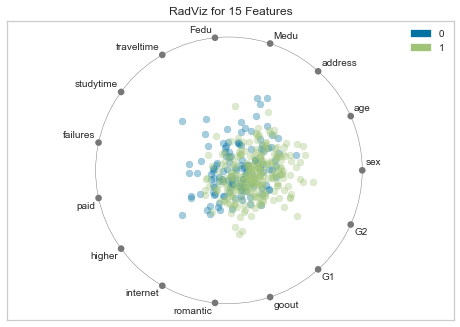

In [30]:
from yellowbrick.features import RadViz

oz = RadViz(classes=encoder.classes_, alpha=0.35).fit(X, y)
_ = oz.poof()

**Radviz** is a multivariate data visualization algorithm that allows us to detect separability between classes. While not conclusive, it appears as those who passed their final grade (green) gravitate more toward age, sex, and going out tendancies. 

Now that we've completed exploratory data analyses and cleaned up our data, lets save our work into a new csv file to use during modeling. 

In [31]:
df.to_csv(r'data/student_performance.csv') #saving new csv file with data cleaned up

### Data Extraction

One way that we can structure our data for easy management is to save files on disk. The Scikit-Learn datasets are already structured this way, and when loaded into a Bunch (a class imported from the datasets module of Scikit-Learn) we can expose a data API that is very familiar to how we've trained on our toy datasets in the past. A Bunch object exposes some important properties:
-  data: array of shape n_samples * n_features
-  target: array of length n_samples
-  feature_names: names of the features
-  target_names: names of the targets
-  filenames: names of the files that were loaded

In order to manage our data set on disk, we'll structure our data as follows:


In [32]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join("..", 'TA_Assignment'))
print(DATA_DIR)

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_Assignment
- student-por.csv
- student-merge.R
- student_performance.csv
- ta_pipeline_assignment.ipynb
- student-mat.csv
- student.txt
- data


## Data Loading and Management
- Define a function to load data 
- Construct the Bunch object for the data set by defining the paths and file names 
- Use Pandas to load data from the csv file
- Extract the target from the data by indexing with column names
- Create a 'Bunch' object, which is a dictionary that exposes dictionary keys as properties so that you can access them with dot notation.

In [33]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the student dataset
    filenames     = {
        'data': os.path.join(root, 'student_performance.csv'),
    }

    # Load the dataset from the text file.
    dataset = pd.read_csv('student_performance.csv', delimiter=',', header=0, skipinitialspace=True, names=FEATURES)
    
       
    # Extract the target from the data
    data = dataset[['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'paid', 'higher', 'internet', 'romantic', 'goout', 'G1',
       'G2']]
    target = dataset['G3']

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)

(395, 15)
(395,)


## Classification 

Now that we have a dataset `Bunch` loaded and ready, we can begin the classification process. Let's attempt to build a classifier with kNN, SVM, and Random Forest classifiers. 

### Load the Algorithms!
- Metrics for evaluating performance
- K-Folds cross-validator provides train/test indices to split data in train/test sets.
- SVC algorithm 
- K Neighbors Classifier
- Random Forest Classifier
- Logistic Regression

One of the reasons I chose to start with these algorithms is because of the recommendations on the __[scikit-learn algorithm cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)__.

In [34]:
from sklearn import metrics

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import yellowbrick as yb
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

### Define a function to evaluate the performance of the models 
- Set our start time
- Define an empty array for our scores variable
- Define our training dataset and our test dataset
- Define estimator and fit to data
- Define predictor and set to data 
- Calculate metrics for evaluating models
- Print evaluation report
- Write estimator to disc for future predictions
- Save model


In [35]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    kf = KFold(n_splits = 12, shuffle=True)

    for train, test in kf.split(dataset.data):
        X_train, X_test = dataset.data.iloc[train], dataset.data.iloc[test]
        y_train, y_test = dataset.target.iloc[train], dataset.target.iloc[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk in order to use for future predictions on new data
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    #saving model with the pickle model
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))

### Fit and Evaluate Various Models

In [36]:
# Perform LinearSVC Classification
fit_and_evaluate(dataset, LinearSVC, "Student LinearSVC Classifier")

Build and Validation of Student LinearSVC Classifier took 0.139 seconds
Validation scores are as follows:

precision    0.913630
recall       0.903961
accuracy     0.903961
f1           0.904130
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-linearsvc-classifier.pickle


In [37]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "Student SVC Classifier", gamma = 'auto')

Build and Validation of Student SVC Classifier took 0.102 seconds
Validation scores are as follows:

precision    0.934425
recall       0.929056
accuracy     0.929056
f1           0.928626
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-svc-classifier.pickle


In [38]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Student kNN Classifier")

Build and Validation of Student kNN Classifier took 0.092 seconds
Validation scores are as follows:

precision    0.917209
recall       0.911458
accuracy     0.911458
f1           0.911351
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-knn-classifier.pickle


In [39]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Student Random Forest Classifier")

Build and Validation of Student Random Forest Classifier took 0.214 seconds
Validation scores are as follows:

precision    0.906275
recall       0.896307
accuracy     0.896307
f1           0.897744
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-random-forest-classifier.pickle


In [40]:
# Perform Logistic Regression
fit_and_evaluate(dataset, LogisticRegression , "Student Logistic Regression")

Build and Validation of Student Logistic Regression took 0.090 seconds
Validation scores are as follows:

precision    0.927718
recall       0.924006
accuracy     0.924006
f1           0.924291
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-logistic-regression.pickle


Based on the initial scores, I will now focus on SVC, kNN, and LogisticRegression because those models preformed the best. Using these estimators resulted in the highest F1 scores, which is a measure of the test's accuracy taking into account both the precision and the recall.

First, let's generate classification reports to get a better sense of the main classification metrics on a per-class basis. We're trying to determine which models have stronger metrics or are more balanced.

### Generating Classification Reports

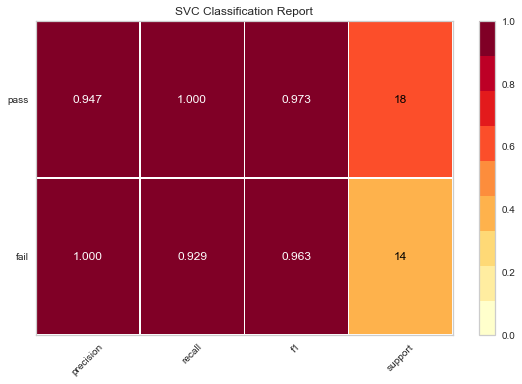

In [41]:
#generating classification report for SVC

# Specify the target classes
classes = ["fail",'pass']

# Create the training and test data
kf = KFold(n_splits = 12, shuffle=True)

for train, test in kf.split(dataset.data):
        X_train, X_test = dataset.data.iloc[train], dataset.data.iloc[test]
        y_train, y_test = dataset.target.iloc[train], dataset.target.iloc[test]

# Instantiate the classification model and visualizer
model = SVC(gamma = 'auto')
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and show the figure

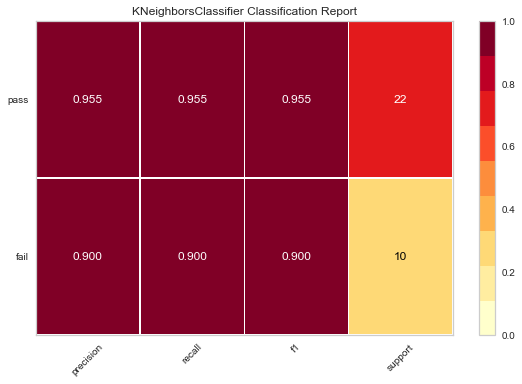

In [42]:
#generating classification report for kNN

# Specify the target classes
classes = ["fail",'pass']

# Create the training and test data
kf = KFold(n_splits = 12, shuffle=True)

for train, test in kf.split(dataset.data):
        X_train, X_test = dataset.data.iloc[train], dataset.data.iloc[test]
        y_train, y_test = dataset.target.iloc[train], dataset.target.iloc[test]

# Instantiate the classification model and visualizer
model = KNeighborsClassifier()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and show the figure

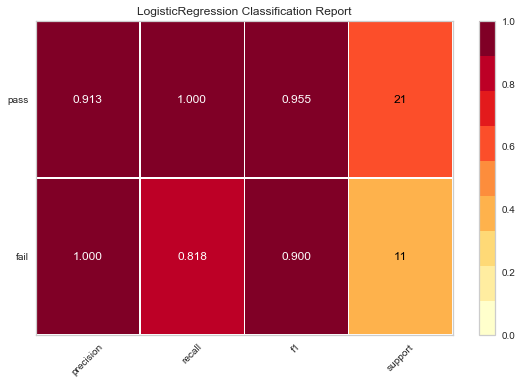

In [43]:
#generating classification report for kNN

# Specify the target classes
classes = ["fail",'pass']

# Create the training and test data
kf = KFold(n_splits = 12, shuffle=True)

for train, test in kf.split(dataset.data):
        X_train, X_test = dataset.data.iloc[train], dataset.data.iloc[test]
        y_train, y_test = dataset.target.iloc[train], dataset.target.iloc[test]

# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and show the figure

It appears that SVC produces strongest classification metrics and there isn't much variance between classes (pass v. fail). In contrast, we can see by looking at the bottom second to left square of the LogisticRegression classification report that the recall score for fails are significantly lower than the recall score for passes. This means for all instances that were actually passes, 100% were classified correctly whereas for all instances that were actually fails, only 81% were classified correctly. 

We're not too concerned with false positives and false negatives, because unlike a medical diagnosis or something similar, the consequences of wrongly classifying a student with a passing grade rather than a fail aren't as detrimental. 

We also see in the support column there is serious class imbalance across all models. 

Given these findings, let's focus on SVC and kNN moving forward. 

### Using Validation Curves for Hyperparameter Tuning

In order to maximize the model's performance, the hyperparameters of the model must be selected which best allow the model to operate in the specified feature space. Most models have multiple hyperparameters and the best way to choose a combination of those parameters is with a grid search. However, it is sometimes useful to plot the influence of a single hyperparameter on the training and test data to determine if the estimator is underfitting or overfitting for some hyperparameter values.

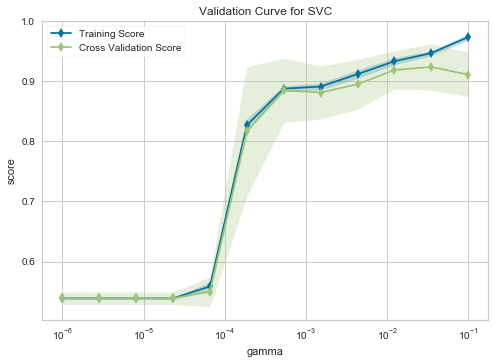

In [44]:
#using validation curve with SVC
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold

# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X, y)
viz.poof()

Here, we're using the Validation Curve with SVC to help us visualize the bias/variance tradeoff. We're specifically looking at the gamma of a support vector classifier, which controls how much influence a single example has, the larger gamma is, the tighter the support vector is around single points (overfitting the model). We can see an inflection point around gamma=.01. At this point the training score climbs rapidly as the SVC memorizes the data, while the cross-validation score begins to decrease as the model cannot generalize to unseen data.

Let's rerun the model using gamma = .01 to see if the score changes. 

In [45]:
# Perform SVC Classification with gamma=.01
fit_and_evaluate(dataset, SVC, "Student SVC Classifier updated gamma", gamma = .01)

Build and Validation of Student SVC Classifier updated gamma took 0.093 seconds
Validation scores are as follows:

precision    0.919646
recall       0.914062
accuracy     0.914062
f1           0.914047
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-svc-classifier-updated-gamma.pickle


It looks like scores are actually slightly lower than before we changed the gamma. This makes me think another hyperparamter needs to be tuned. We can use a grid search to understand the performance of a model with respect to multiple hyperparameters. 

Before we use a grid search, let's use the Validation Curve with kNN to help us select the best k. A small value for K provides the most flexible fit, which will have low bias but high variance. Larger values of K will have smoother decision boundaries which means lower variance but increased bias.

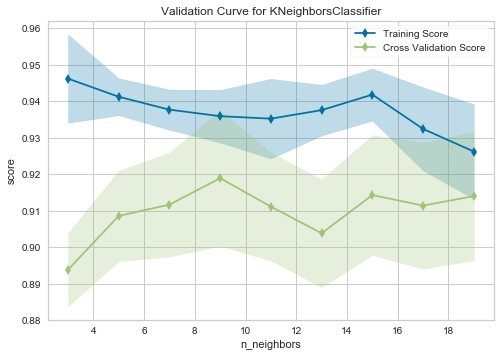

In [46]:
#using validation curve with kNN

cv = StratifiedKFold(4)
param_range = np.arange(3, 20 , 2)

oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)

oz.fit(X, y)
oz.poof()

We can see an inflection point around k=9. Both the training score and CV score are high at these points and drop after it. Let's rerun the model with the updated k. 

In [47]:
# Perform kNN Classification with n_neighbors=9
fit_and_evaluate(dataset, KNeighborsClassifier, "Student kNN Classifier updated k", n_neighbors=9)

Build and Validation of Student kNN Classifier updated k took 0.094 seconds
Validation scores are as follows:

precision    0.920832
recall       0.916351
accuracy     0.916351
f1           0.916690
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-knn-classifier-updated-k.pickle


Scores improved once we changed the value of k, nice!

This being said, we're not done yet. In order to maximize the model's score, the hyperparameters of the model must be selected which best allow the model to operate in the specified feature space. Most models have multiple hyperparameters and the best way to choose a combination of those parameters is with a grid search.

### Grid Search

In [48]:
#grid search on SVC model
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.672, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.675, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.910, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.950, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.917, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.910, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.917, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.892, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.893, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.909, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.892, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.892, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.885, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.909, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.892, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.910, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.909, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.892, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [49]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [50]:
# Perform SVC Classification with best parameters
fit_and_evaluate(dataset, SVC, "Student SVC Classifier best paramters", C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Build and Validation of Student SVC Classifier best paramters took 0.096 seconds
Validation scores are as follows:

precision    0.924342
recall       0.919034
accuracy     0.919034
f1           0.919374
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-svc-classifier-best-paramters.pickle


In [52]:
#grid search on SVC model
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(class_weight = 'balanced'), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.672, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.331, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.325, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.885, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.901, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.933, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.902, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.909, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.925, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.885, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.860, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.925, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.902, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.892, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.893, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.893, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.925, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.893, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.884, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.892, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.3s finished
/Users/mtm101/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [53]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [54]:
# curious to see how changing class_weight affects score given class imbalance
#Perform SVC Classification with best parameters and class_weight = 'balanced'
fit_and_evaluate(dataset, SVC, "Student SVC Classifier best paramters and updated class_weight", 
    C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Build and Validation of Student SVC Classifier best paramters and updated class_weight took 0.098 seconds
Validation scores are as follows:

precision    0.919723
recall       0.906171
accuracy     0.906171
f1           0.907991
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-svc-classifier-best-paramters-and-updated-class_weight.pickle


In [55]:
#grid search on kNN model
# defining parameter range 
param_grid = {'n_neighbors':[3,5,7,9,11,13,15],
              'weights':['uniform','distance'],
              'leaf_size':[1,3,5,7,9],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'n_jobs':[-1]}
  
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 280 candidates, totalling 840 fits
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform, score=0.910, total=   1.8s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform, score=0.893, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform, score=0.867, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=distance, score=0.910, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=distance, score=0.893, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=distance, score=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=7, weights=distance, score=0.908, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.893, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.934, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.892, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=distance, score=0.893, total=   0.0s
[CV] algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_jobs=-1, n_neighbors=9, weights=distance, score=0

[CV]  algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=11, weights=distance, score=0.926, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=11, weights=distance 
[CV]  algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=11, weights=distance, score=0.900, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=uniform 
[CV]  algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=uniform, score=0.893, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=uniform 
[CV]  algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=uniform, score=0.926, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=uniform 
[CV]  algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=uniform, score=0.900, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=distance 
[CV]  algorithm=auto, leaf_size=3, n_jobs=-1, n_neighbors=13, weights=distan

[CV]  algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=3, weights=distance, score=0.867, total=   0.0s
[CV] algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.902, total=   0.0s
[CV] algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.917, total=   0.0s
[CV] algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.908, total=   0.0s
[CV] algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=distance, score=0.902, total=   0.0s
[CV] algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=auto, leaf_size=7, n_jobs=-1, n_neighbors=5, weights=distance, score=0

[CV]  algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=9, weights=distance, score=0.892, total=   0.0s
[CV] algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.902, total=   0.0s
[CV] algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.926, total=   0.0s
[CV] algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.900, total=   0.0s
[CV] algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=distance 
[CV]  algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=distance, score=0.902, total=   0.0s
[CV] algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=distance 
[CV]  algorithm=auto, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=distanc

[CV]  algorithm=ball_tree, leaf_size=1, n_jobs=-1, n_neighbors=15, weights=distance, score=0.934, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_jobs=-1, n_neighbors=15, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, n_jobs=-1, n_neighbors=15, weights=distance, score=0.908, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_jobs=-1, n_neighbors=3, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_jobs=-1, n_neighbors=3, weights=uniform, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_jobs=-1, n_neighbors=3, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_jobs=-1, n_neighbors=3, weights=uniform, score=0.884, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_jobs=-1, n_neighbors=3, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_jobs=-1, n_neighbors=3, weights=uniform, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_jobs=-1, n_neighbors=3, weights=distance 
[CV]  algorithm=ball_tree, leaf_s

[CV]  algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.908, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=distance, score=0.902, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=distance, score=0.934, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=distance, score=0.908, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.902, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=ball_tree, leaf

[CV]  algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=uniform, score=0.893, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=uniform, score=0.917, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=uniform, score=0.908, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=distance, score=0.893, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=distance, score=0.926, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=7, n_jobs=-1, n_neighbors=15, weights=distance 
[CV]  algorithm=ball_tree

[CV]  algorithm=ball_tree, leaf_size=9, n_jobs=-1, n_neighbors=15, weights=uniform, score=0.900, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_jobs=-1, n_neighbors=15, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=9, n_jobs=-1, n_neighbors=15, weights=distance, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_jobs=-1, n_neighbors=15, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=9, n_jobs=-1, n_neighbors=15, weights=distance, score=0.926, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_jobs=-1, n_neighbors=15, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=9, n_jobs=-1, n_neighbors=15, weights=distance, score=0.908, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform, score=0.910, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_jobs=-1, n_neighbors=3, weights=uniform 
[CV]  algorithm=kd_tree, leaf_siz

[CV]  algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.908, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance, score=0.902, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance, score=0.917, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance, score=0.908, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform, score=0.902, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=3, n_jobs=-1, n_nei

[CV]  algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.892, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=distance, score=0.910, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=distance, score=0.926, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=11, weights=distance, score=0.892, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=13, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=13, weights=uniform, score=0.902, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_jobs=-1, n_neighbors=13, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=5, n_jobs

[CV]  algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=3, weights=distance, score=0.893, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=3, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=3, weights=distance, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.910, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.917, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.908, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=9, n_jobs=-1, n_neigh

[CV]  algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.893, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.926, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=uniform, score=0.925, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=distance, score=0.893, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=distance, score=0.926, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_jobs=-1, n_neighbors=5, weights=dista

[CV]  algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance, score=0.926, total=   0.1s
[CV] algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance 
[CV]  algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=5, weights=distance, score=0.925, total=   0.1s
[CV] algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform, score=0.910, total=   0.1s
[CV] algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform, score=0.909, total=   0.1s
[CV] algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform 
[CV]  algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=uniform, score=0.908, total=   0.1s
[CV] algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=distance 
[CV]  algorithm=brute, leaf_size=3, n_jobs=-1, n_neighbors=7, weights=distan

[CV]  algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=7, weights=uniform, score=0.908, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=7, weights=distance 
[CV]  algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=7, weights=distance, score=0.910, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=7, weights=distance 
[CV]  algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=7, weights=distance, score=0.909, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=7, weights=distance 
[CV]  algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=7, weights=distance, score=0.908, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.902, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, n_jobs=-1, n_neighbors=9, weights=unif

[CV]  algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.902, total=   0.1s
[CV] algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.926, total=   0.1s
[CV] algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=uniform 
[CV]  algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=uniform, score=0.900, total=   0.1s
[CV] algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=distance, score=0.902, total=   0.1s
[CV] algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=distance, score=0.917, total=   0.1s
[CV] algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=brute, leaf_size=7, n_jobs=-1, n_neighbors=9, weights=dista

[CV]  algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=9, weights=distance, score=0.917, total=   0.1s
[CV] algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=9, weights=distance 
[CV]  algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=9, weights=distance, score=0.900, total=   0.1s
[CV] algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.910, total=   0.1s
[CV] algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.917, total=   0.1s
[CV] algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform 
[CV]  algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=uniform, score=0.908, total=   0.1s
[CV] algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weights=distance 
[CV]  algorithm=brute, leaf_size=9, n_jobs=-1, n_neighbors=11, weight

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   32.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 3, 5, 7, 9], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [56]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [57]:
# Perform kNN Classification with best parameters
fit_and_evaluate(dataset, KNeighborsClassifier, "Student kNN Classifier best parameters", 
                 algorithm='ball_tree', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Build and Validation of Student kNN Classifier best parameters took 1.352 seconds
Validation scores are as follows:

precision    0.927638
recall       0.921559
accuracy     0.921559
f1           0.922354
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/TA_assignment/student-knn-classifier-best-parameters.pickle


**Conclusion:** Based off the updated models with tuned hyperparameters, the "Student kNN Classifier best parameters" is the best performing model. The results show that a good predictive accuracy can be achieved, provided that the first and/or second school period grades (G1 and G2) are available. Although student achievement is highly influenced by past grades (including the number of past failures), an exploratory analysis has shown that there are also other relevant features (e.g., parent’s education, socialness/going out with friends, and aspirations to enter higher education). By being able to predict student acheivement using this model, eductors could identify which students need additional support or resources, improving the quality of education for all students. 

In future work (read: if I had more time), I would review feature selection and explore other strategies related to evaluating feature importance. I'm not convinced I selected the optimal combination of features. Additionally, I would better concentrate on class imbalance and explore techniques to combat issues of imbalance, whether it's through penalization, oversampling, or undersampling. 